In [10]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/final.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,value,hours,daylight,day_of_the_week,is_week_day,categories
0,0,0,2014-02-14 14:27:00,51.846,14,1,4,1,3
1,1,1,2014-02-14 14:32:00,44.508,14,1,4,1,3
2,2,2,2014-02-14 14:37:00,41.244,14,1,4,1,3
3,3,3,2014-02-14 14:42:00,48.568,14,1,4,1,3
4,4,4,2014-02-14 14:47:00,46.714,14,1,4,1,3


Isolation Forest
          0         1         2    3         4
0  2.030111  0.361158  0.707107  0.5  0.632456
1  0.324801  0.361158  0.707107  0.5  0.632456
2 -0.433734  0.361158  0.707107  0.5  0.632456
3  1.268322  0.361158  0.707107  0.5  0.632456
4  0.837463  0.361158  0.707107  0.5  0.632456
isolation forest trained, predicting
0    3991
1      41
Name: anomaly_by_if, dtype: int64
visualizing anomalies predicted by isolation forest in scattered plot


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


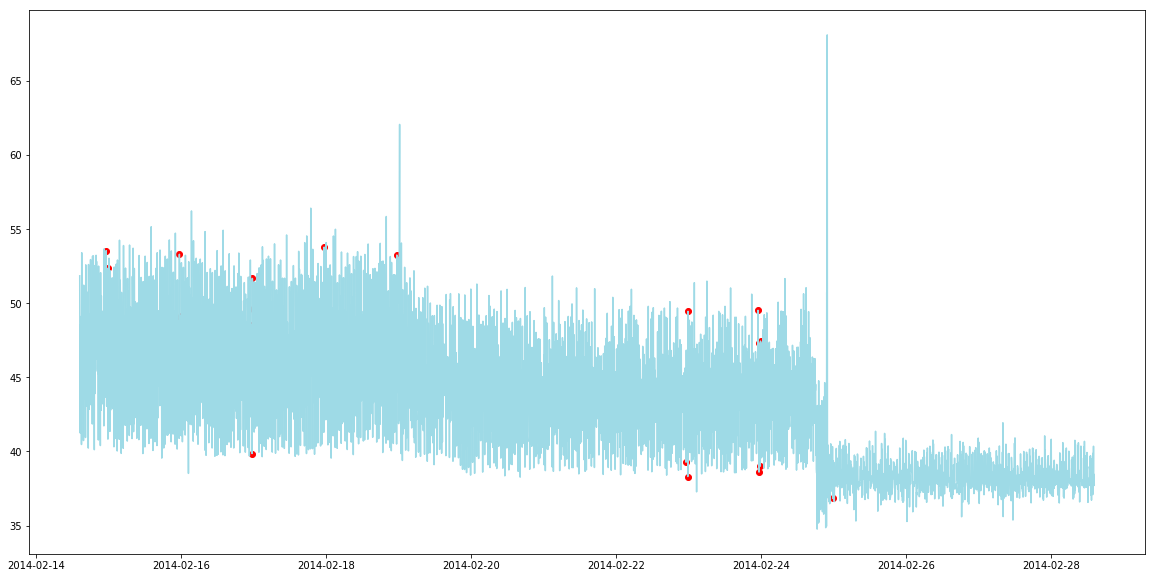

In [11]:
print "Isolation Forest"
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
df_features = df[['value', 'hours', 'daylight', 'day_of_the_week', 'is_week_day']]
min_max_scaler = StandardScaler()
np_scaled = min_max_scaler.fit_transform(df_features)
data = pd.DataFrame(np_scaled)
NORMAL_COLOR = '#9edae6'
print data.head()

outliers_fraction = 0.01
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
with open('../models/isolation_forest.model','wb') as f:
    pickle.dump(model,f)
print "isolation forest trained, predicting"
df['anomaly_by_if'] = pd.Series(model.predict(data))
df['anomaly_by_if'] = df['anomaly_by_if'].map( {1: 0, -1: 1} )
print(df['anomaly_by_if'].value_counts())

print "visualizing anomalies predicted by isolation forest in scattered plot"
plt.figure(figsize=(20, 10))
anomalies = df.loc[df['anomaly_by_if'] == 1, ['timestamp', 'value']]
plt.plot(df['timestamp'], df['value'], color=NORMAL_COLOR)
plt.scatter(anomalies['timestamp'],anomalies['value'], color='red')
plt.show()

visualizing anomalies predicted by isolation forest in histogram


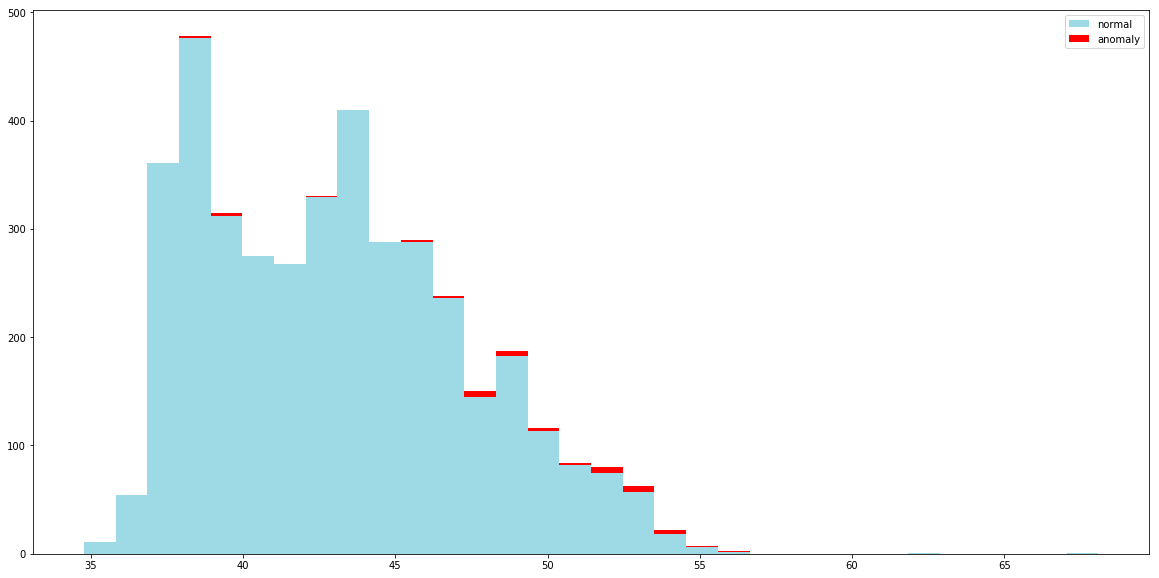

In [4]:
print "visualizing anomalies predicted by isolation forest in histogram"
normal = df.loc[df['anomaly_by_if'] == 0, 'value']
anomaly = df.loc[df['anomaly_by_if'] == 1, 'value']

plt.figure(figsize=(20, 10))
plt.hist([normal, anomaly], bins=32, stacked=True, color=[NORMAL_COLOR, 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

In [12]:
print "One Class SVM"
from sklearn.svm import OneClassSVM

model =  OneClassSVM(nu=0.95 * outliers_fraction)
data = pd.DataFrame(np_scaled)
model.fit(data)
with open('../models/one_class_SVM.model','wb') as f:
    pickle.dump(model,f)

df['anomaly_by_ocsvm'] = pd.Series(model.predict(data))
df['anomaly_by_ocsvm'] = df['anomaly_by_ocsvm'].map( {1: 0, -1: 1} )
print(df['anomaly_by_ocsvm'].value_counts())

One Class SVM
0    3994
1      38
Name: anomaly_by_ocsvm, dtype: int64


visualizing anomalies predicted by one class SVM in scattered plot


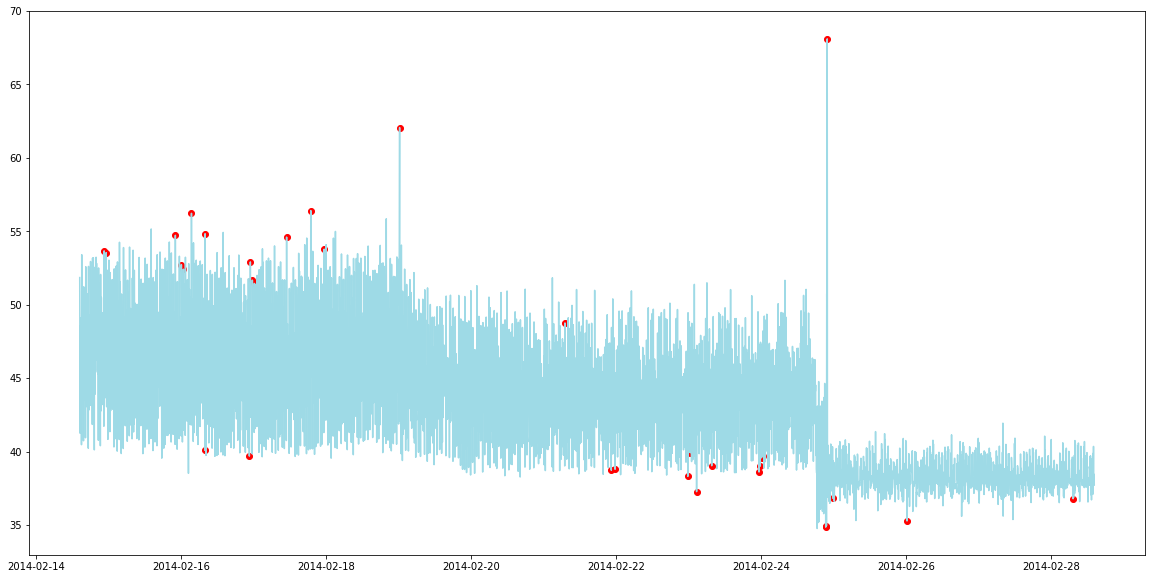

In [6]:
print "visualizing anomalies predicted by one class SVM in scattered plot"
plt.figure(figsize=(20, 10))
anomalies = df.loc[df['anomaly_by_ocsvm'] == 1, ['timestamp', 'value']]
plt.plot(df['timestamp'], df['value'], color=NORMAL_COLOR)
plt.scatter(anomalies['timestamp'],anomalies['value'], color='red')
plt.show()

visualizing anomalies predicted by one class SVM in histogram


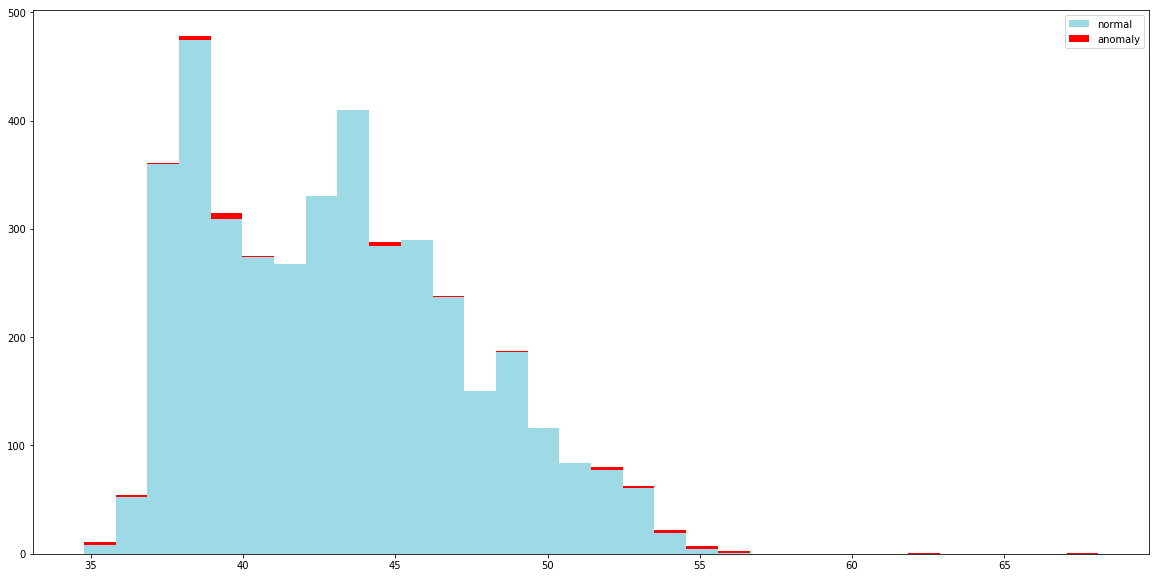

In [7]:
print "visualizing anomalies predicted by one class SVM in histogram"
normal = df.loc[df['anomaly_by_ocsvm'] == 0, 'value']
anomaly = df.loc[df['anomaly_by_ocsvm'] == 1, 'value']

plt.figure(figsize=(20, 10))
plt.hist([normal, anomaly], bins=32, stacked=True, color=[NORMAL_COLOR, 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

Local Outlier Factor
0    3995
1      37
Name: anomaly_by_lof, dtype: int64
visualizing anomalies predicted by local outlier factor in scattered plot


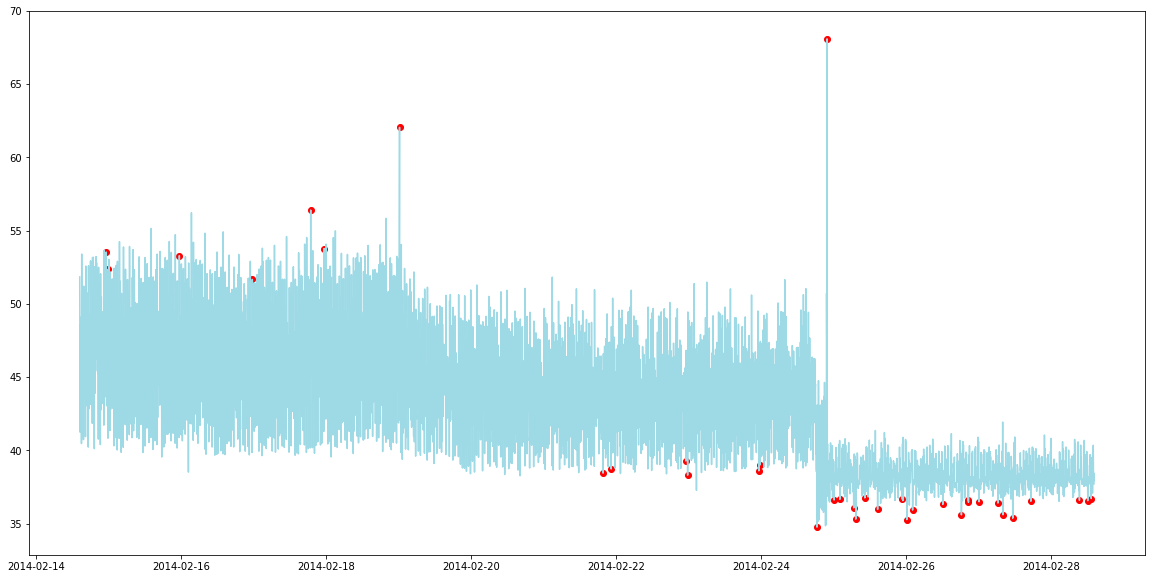

In [8]:
print "Local Outlier Factor"
from sklearn.neighbors import LocalOutlierFactor

model =  LocalOutlierFactor(algorithm='auto', contamination=outliers_fraction, novelty=True)
model.fit(data)

df['anomaly_by_lof'] = pd.Series(model.predict(data))
df['anomaly_by_lof'] = df['anomaly_by_lof'].map( {1: 0, -1: 1} )
print(df['anomaly_by_lof'].value_counts())

print "visualizing anomalies predicted by local outlier factor in scattered plot"
plt.figure(figsize=(20, 10))
anomalies = df.loc[df['anomaly_by_lof'] == 1, ['timestamp', 'value']]
plt.plot(df['timestamp'], df['value'], color=NORMAL_COLOR)
plt.scatter(anomalies['timestamp'],anomalies['value'], color='red')
plt.show()

visualizing anomalies predicted by local outlier factor in histogram


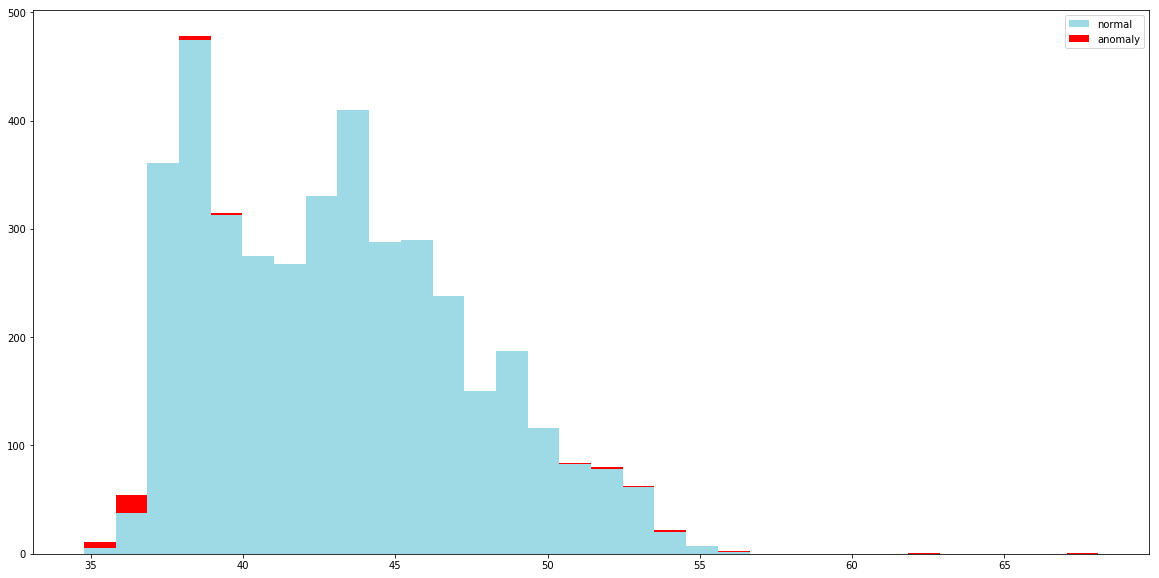

In [9]:
print "visualizing anomalies predicted by local outlier factor in histogram"
normal = df.loc[df['anomaly_by_lof'] == 0, 'value']
anomaly = df.loc[df['anomaly_by_lof'] == 1, 'value']

plt.figure(figsize=(20, 10))
plt.hist([normal, anomaly], bins=32, stacked=True, color=[NORMAL_COLOR, 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()